DESCRIPTIOON: Epidemiology and the SIR Model

# Epidemiology and the SIR Model

See:
* [Compartmental models in epidemiology](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology)
* [The SIR Model for Spread of Disease - The Differential Equation Model](https://maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model)

## Overview

The SIR model is a system of three linear differential equations that model how a pathogen moves through a population. The three numbers are:
* Suseptible - the people that haven't gotten sick yet but will eventually get sick. We start with the total population.
* Infected - the people that are currently sick.
* Recovered - the people that have recovered.

In [1]:
from sympy import symbols, solve, simplify, factor, roots
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# INITIAL CONDITIONS

# The number of individuals
N = 10000000

# The number of susceptible individuals
S = N

# The number of infected individuals
I = 1

# The number of recovered individuals
R = 0

# The number of contacts per day that are sufficient to spread the disease.
b = 2

# The percent of the infected group will recover during any given day. 
# For example, if the average duration of infection is three days, then, on average, one-third of the 
# currently infected population recovers each day.
k = 0.33

# Time starts at zero
T = 0.0

# Time changes 1 day per step
dt = 0.1

# Create numpy arrays for the columns
t = []
s = []
i = []
r = []

print(f"""
Step      day          S          I          R 
---- -------- ---------- ---------- ----------
""")
for step in range(0, 1000):
    print(f"{step:>4} {T:>8.2f} {S:>10.0f} {I:>10.0f} {R:>10.0f}")
    
    t.append(T)
    s.append(S)
    i.append(I)
    r.append(R)
    
    ds = (-b * I * S / N) * dt
    di = (b * I * S / N - k * I) * dt
    dr = (k * I) * dt
    
    S = S + ds
    I = I + di
    R = R + dr
    T = T + dt
    
    if R > 0.99 * N:
        break
    



Step      day          S          I          R 
---- -------- ---------- ---------- ----------

   0     0.00   10000000          1          0
   1     0.10   10000000          1          0
   2     0.20   10000000          1          0
   3     0.30    9999999          2          0
   4     0.40    9999999          2          0
   5     0.50    9999999          2          0
   6     0.60    9999998          3          0
   7     0.70    9999998          3          0
   8     0.80    9999997          3          0
   9     0.90    9999996          4          1
  10     1.00    9999996          5          1
  11     1.10    9999995          5          1
  12     1.20    9999994          6          1
  13     1.30    9999992          7          1
  14     1.40    9999991          9          2
  15     1.50    9999989         10          2
  16     1.60    9999987         12          2
  17     1.70    9999985         14          3
  18     1.80    9999982         16          3
  19     1

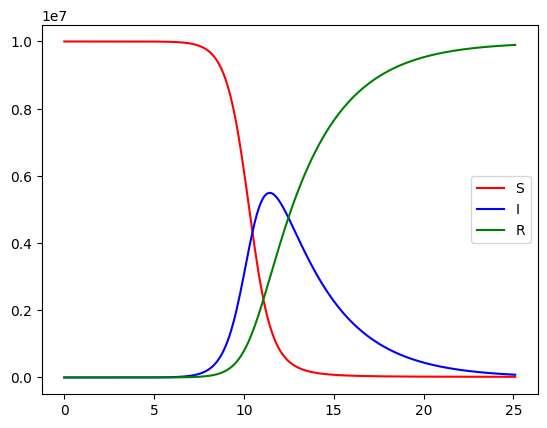

In [66]:
# Plot it
plt.plot(t, s, 'r', label="S")
plt.plot(t, i, 'b', label="I")
plt.plot(t, r, 'g', label="R")
plt.legend()
plt.show()